epoch: 10, loss: 4332.5479
epoch: 20, loss: 3234.8281
epoch: 30, loss: 2440.1641
epoch: 40, loss: 1864.2965
epoch: 50, loss: 1446.5863
epoch: 60, loss: 1143.3293
epoch: 70, loss: 922.9869
epoch: 80, loss: 762.7693
epoch: 90, loss: 646.1901
epoch: 100, loss: 561.3101


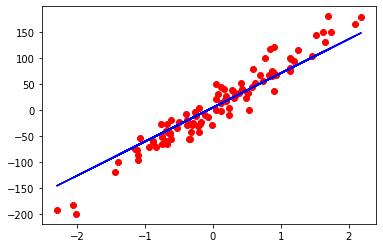

In [6]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape tensor

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

# Define model
model = nn.Linear(input_size, output_size)

# Define loss
criterion = nn.MSELoss()

# Define optim
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

n_iters = 100

for epoch in range(n_iters):
    #forward pass and loss
    y_prediction = model(X)
    loss = criterion(y_prediction, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

predicted = model(X).detach().numpy() # detach removes this from computation graph. generates new tensor with requires_grad=False
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()